<a href="https://colab.research.google.com/github/Harsh62004/Summer_School_2022/blob/main/Face_Detection_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Live Face Detection Demo

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 57.0 MB/s eta 0:00:00


## Utility Functions

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

def resize_and_show(image, desired_height=480, desired_width=480):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (desired_width, math.floor(h/(w/desired_width))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/desired_height)), desired_height))
  cv2_imshow(img)

In [3]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Detect Face';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  return binary

## Run face detection

In [4]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

In [5]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

<IPython.core.display.Javascript object>

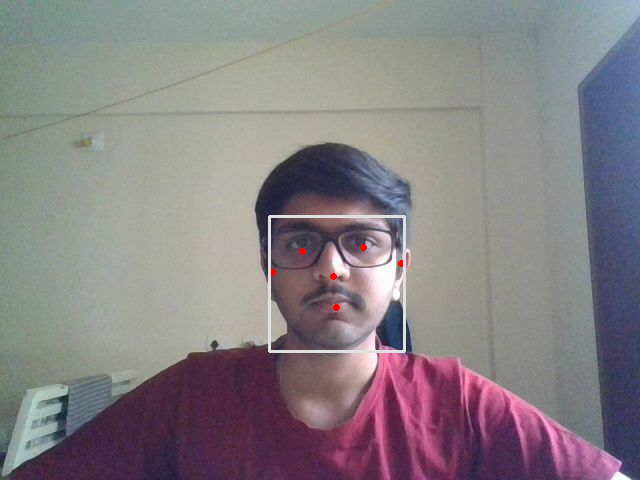

In [7]:
# capture image
binary = take_photo()

# Decode binary to numpy array
image = cv2.imdecode(np.frombuffer(binary, np.uint8), cv2.IMREAD_COLOR)
height, width = image.shape[:2]

# Run MediaPipe Face Detection with short range model.
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:

  # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
  results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if results.detections:
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image, height, width)

## Face Detection Model [Reference Paper](https://arxiv.org/pdf/1907.05047.pdf)

### Model

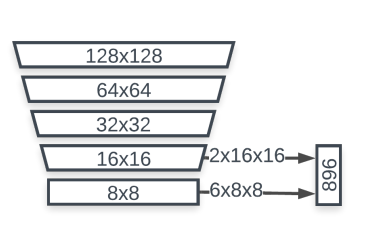

## Anchors

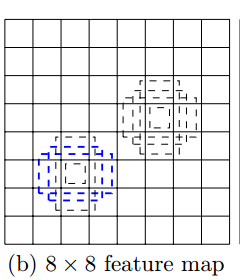